In [1]:
import arff
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
import re

In [35]:
df = pd.read_csv('/home/veerlosar/Desktop/df.csv', encoding='utf-8')
#Unnamed column csv 
df.head()

,Unnamed: 0,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,class
0,0,liveturn_0,0.0125,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,...,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848,0.0
1,1,liveturn_0,0.0125,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,...,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777,0.0
2,2,liveturn_0,0.0125,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,...,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269,0.0
3,3,liveturn_0,0.0125,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,...,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453,0.0
4,4,liveturn_0,0.0125,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,...,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127,0.0


In [36]:
y = df['class']

In [43]:
#df.drop(['class', 'Unnamed: 0', 'name', 'frameTime', 'F0_sma_min', 'F0env_sma_minPos'], axis=1, inplace=True)
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,40.03075,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,40.60280,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,121.68250,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,43.28719,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,41.56385,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127


In [42]:
df.drop(['F0env_sma_minPos'], axis=1, inplace=True)

In [38]:
df.loc[df['F0env_sma_minPos'] != 0.0]

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3


In [44]:
from scipy.stats import zscore

df = df.astype('float64').apply(zscore)
df.tail()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
2261,-0.622901,-0.166070,-0.622901,-1.095664,-0.333119,-0.652325,0.112416,-0.571602,-0.660275,-0.361358,...,-1.316521,-1.440435,-0.344190,-0.671533,0.530553,-0.052138,-0.588587,-0.561284,-0.603923,-0.649924
2262,-0.243363,-0.166070,-0.243363,-0.191957,-0.333119,-0.069505,-0.391995,0.137341,-0.174751,-0.305712,...,-1.719882,-2.100556,1.304292,0.894995,0.860196,-0.152377,-0.827593,-0.925890,-0.836096,-0.968070
2263,-0.636969,-0.166070,-0.636968,-0.756774,-0.333119,-0.666090,0.132867,-0.592658,-0.672844,-0.361606,...,0.077142,0.165795,-0.260058,-0.348325,0.230724,-0.152377,-0.893542,-0.274427,-0.904728,-0.713737
2264,-0.642835,-0.166070,-0.642834,-0.692223,-0.333119,-0.688179,0.169505,-0.628588,-0.691138,-0.361774,...,1.027507,1.028865,-0.408003,-0.363143,0.270278,-0.152377,-0.502416,-0.315363,-0.497688,-0.468060
2265,-0.444550,-0.147332,-0.444549,0.211484,-0.333119,-0.428845,0.185949,-0.435176,-0.454293,-0.347675,...,-0.511179,-0.453937,0.272482,0.513493,0.595823,-0.152377,-0.903181,-0.652281,-0.914759,-0.893633


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.18, random_state=42)

In [48]:
X_train.isnull().sum().sum()

0

In [49]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train)
ranking = np.argsort(selector.scores_)[::-1]
print('Top-10 features according to SelectKBest, f_classif: ')
print()
print('{}'.format(df.columns[ranking][0:11]))

Top-10 features according to SelectKBest, f_classif: 

Index(['F0env_sma_quartile2', 'F0_sma_quartile3', 'F0_sma_stddev',
       'F0env_sma_quartile3', 'F0env_sma_de_amean', 'F0env_sma_linregc1',
       'F0_sma_linregerrA', 'mfcc_sma[1]_quartile3', 'mfcc_sma[12]_max',
       'F0_sma_linregerrQ', 'mfcc_sma[12]_linregerrQ'],
      dtype='object')


In [50]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#took way too long
rfe = RFE(LogisticRegression(), 10)
fit = rfe.fit(X_train, y_train)
bools = fit.support_
indexes = [i for i, b in enumerate(bools) if b]
print('Top-10 features according to RFE: ')
print()
print(df.columns[indexes])


KeyboardInterrupt: 

In [51]:
#models
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier(n_estimators=250, max_depth=10,
                             random_state=0)
clf.fit(X_train, y_train)
y_pred_clf_test = clf.predict(X_test)
y_pred_clf_train = clf.predict(X_train)

/home/veerlosar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [52]:
from sklearn import svm


svm_ = svm.SVC(kernel='poly', degree=2) 
svm_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
svm_.fit(X_train, y_train)
y_pred_svm_test = svm_.predict(X_test)
y_pred_svm_train = svm_.predict(X_train)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt_test = svm_.predict(X_test)
y_pred_dt_train = svm_.predict(X_train)

In [55]:
ada_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
    n_estimators=250,
    learning_rate=1.0)

ada_dt.fit(X_train, y_train)
y_pred_ada_dt_test = ada_dt.predict(X_test)
y_pred_ada_dt_train = ada_dt.predict(X_train)

In [56]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC(loss='squared_hinge', penalty='l1', dual=False)
lin_svm.fit(X_train, y_train)
y_pred_lin_svm_test = lin_svm.predict(X_test)
y_pred_lin_svm_train = lin_svm.predict(X_train)

In [57]:
from sklearn.metrics import accuracy_score

print('Random Forests: ', accuracy_score(y_test, y_pred_clf_test), accuracy_score(y_train, y_pred_clf_train))
print('Kernel SVM: ', accuracy_score(y_test, y_pred_svm_test), accuracy_score(y_train, y_pred_clf_train), 
      svm_.score(X_test, y_test))
print('Decision Tree: ', accuracy_score(y_test, y_pred_svm_test), accuracy_score(y_train, y_pred_clf_train))
print('Decision Tree with AdaBoost: ', accuracy_score(y_test, y_pred_ada_dt_test), accuracy_score(y_train, y_pred_ada_dt_train))
print('Linear SVM: ', accuracy_score(y_test, y_pred_lin_svm_test), accuracy_score(y_train, y_pred_lin_svm_train))

Random Forests:  0.9313725490196079 1.0
Kernel SVM:  0.9411764705882353 1.0 0.9411764705882353
Decision Tree:  0.9411764705882353 1.0
Decision Tree with AdaBoost:  0.9240196078431373 1.0
Linear SVM:  0.9191176470588235 1.0


In [58]:
importances = clf.feature_importances_

print(list(importances).index(max(importances)), max(importances))

488 0.02363829123488984


In [59]:
indices = np.argsort(importances)[::-1]

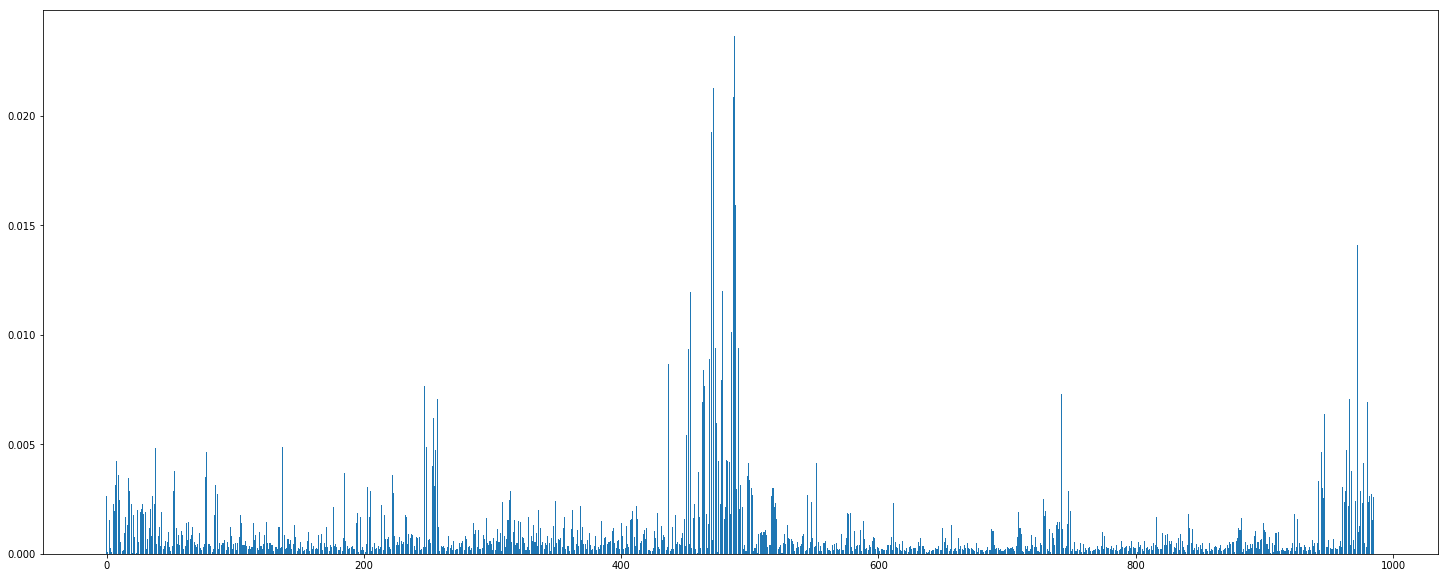

In [60]:
plt.figure(figsize=(25, 10))
plt.bar(indices, importances[indices])
plt.show()

In [61]:
def predict_new(filename):
    models = [ada_dt, clf, svm_, dt, lin_svm]
    command = '/home/veerlosar/Downloads/opensmile-2.3.0/SMILExtract -C /home/veerlosar/Downloads/opensmile-2.3.0/config/emobase.conf -I /home/veerlosar/Downloads/ERHS/{} -O /home/veerlosar/Downloads/ERHS/{}.arff'.format(filename, filename[:-4])
    process = subprocess.Popen(command.split())
    output, error = process.communicate()
    arff_file = arff.load(open('{}.arff'.format(filename[:-4]), 'r'))
    df = pd.DataFrame(np.array(arff_file['data']))
    #df = df.drop([0, 1], axis=1)
    for model in models:
        print('{}: '.format(model), '\n', model.predict(df))
        

In [62]:
predict_new('/home/veerlosar/Downloads/ERHS/happy_maria.wav')

ValueError: Number of features of the model must match the input. Model n_features is 986 and input n_features is 988 

In [ ]:
# do PCA
# try confusion matrix
# compare features from original df and new df